Haberman Dataset:

1) Dataset source: https://www.kaggle.com/gokulkarthik/haberman-s-survival-exploratory-data-analysis/data
2)It consists of information about the patients who had undergone Surgery for breast cancer.
3) Brief Information: The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.
4)Objective: To predict whether the patient survived for more than 5 years or not having undergone the surgery given the 3 features. i.e. Classify a new patient to one of the New Classes given the 3 features.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Loading Haberman Dataset into Pandas DF

haberman = pd.read_csv("haberman.csv",header=None)

#1.Number of Points and features

print(haberman.shape)

(306, 4)


In [2]:
#Inserting columns into the Data set downloaded from Kaggle
haberman.columns=["Patients age","Year of operation","Anxillary Nodes","Survival Status"]

In [3]:
#Print Name of the columns
print(haberman.columns)

Index(['Patients age', 'Year of operation', 'Anxillary Nodes',
       'Survival Status'],
      dtype='object')


In [4]:
haberman["Survival Status"].value_counts()

#This is an unbalanced dataset as the counts differ by considerably big margin

1    225
2     81
Name: Survival Status, dtype: int64

In [ ]:
Observation:
    1)Totally 306 data points and 4 columns
    2)Out of the 4, 3 are independent variables
    3)Survival Status is Dependant variable.
    4)This is an imbalanced data set (as 225 with class value 1 and 81 with class value 2)
    5)The objective of this analysis is to use these features and try to predict if the patient survives or does not survive.

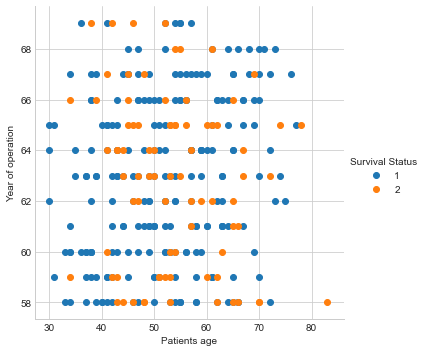

In [5]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="Survival Status", size=5) \
   .map(plt.scatter, "Patients age", "Year of operation") \
   .add_legend();
plt.show();

#A 2-d scatter plot was drawn with Patients age in x-axis and Year of operation in y-axis
#Nothing can be derived out of the plot(Except for the fact that patient aged less than 32 has always survived) as there is much overlap


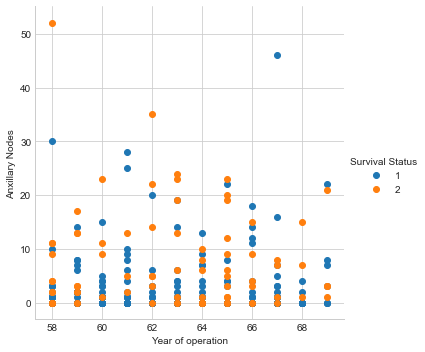

In [6]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="Survival Status", size=5) \
   .map(plt.scatter, "Year of operation", "Anxillary Nodes") \
   .add_legend();
plt.show();

#A 2-d scatter plot was drawn with Year of operation in x-axis and Anxillary Nodes in y-axis
#Nothing can be derived out of the plot as there is much overlap between the points


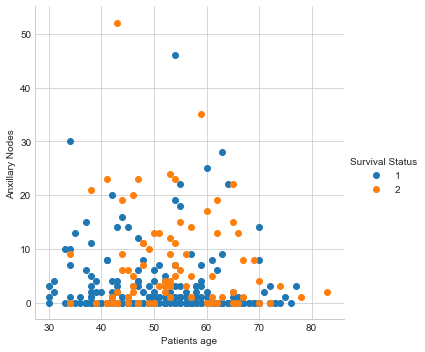

In [7]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="Survival Status", size=5) \
   .map(plt.scatter, "Patients age", "Anxillary Nodes") \
   .add_legend();
plt.show();

#A 2-d scatter plot was drawn with Patients age in x-axis and Anxillary nodes in y-axis
#Nothing can be derived out of the plot(Except for the fact that patient aged less than 32 has always survived) as there is much overlap between the points


Observations:
1) 2-d scatter plot was plotted using all 3 combinations of the features.
2) As there is much overlap in all three plots, the same cannot be used to classify a patient.
3) Patient aged less than 32 has always survived.

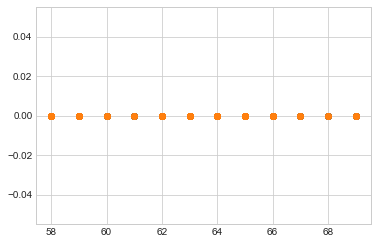

In [8]:
haberman_1 = haberman.loc[haberman["Survival Status"] == 1]
haberman_2 = haberman.loc[haberman["Survival Status"] == 2]

plt.plot(haberman_1["Year of operation"], np.zeros_like(haberman_1["Year of operation"]),'o')
plt.plot(haberman_2["Year of operation"], np.zeros_like(haberman_2["Year of operation"]),'o')
plt.show()

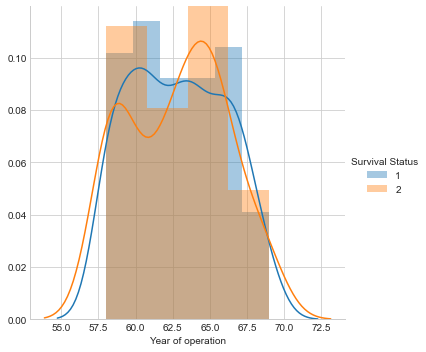

In [27]:
sns.FacetGrid(haberman, hue="Survival Status", size=5) \
   .map(sns.distplot, "Year of operation") \
   .add_legend();
plt.show();

#Plotted the distribution plot using Year of operation as a feature
#Due to huge overlapping no classification is possible

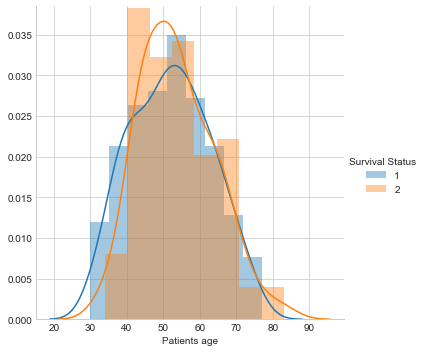

In [29]:
sns.FacetGrid(haberman, hue="Survival Status", size=5) \
   .map(sns.distplot, "Patients age") \
   .add_legend();
plt.show();

#Plotted the distribution plot using Patients age as a feature
#Due to huge overlapping no classification is possible, however a patient aged <35 always survives

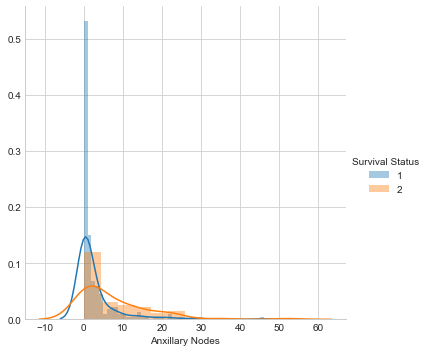

In [31]:
sns.FacetGrid(haberman, hue="Survival Status", size=5) \
   .map(sns.distplot, "Anxillary Nodes") \
   .add_legend();
plt.show();

#Plotted the distribution plot using Anxillary nodes as a feature
#If the anxillary node is 0 Patient mostly survives

Observation:
1)The distribution plot was plotted for Survival status using the 3 different features
2)Anxillary Nodes was helpful feature,as people with anxillary nodes 0 mostly survives.
3)Year of operation and Patients age were not much useful as there is much overlap

[0.01633987 0.03594771 0.02614379 0.0620915  0.09803922 0.05228758
 0.08169935 0.09150327 0.08169935 0.09803922 0.08496732 0.04901961
 0.06535948 0.06862745 0.01960784 0.03921569 0.01633987 0.00653595
 0.00326797 0.00326797]
[30.   32.65 35.3  37.95 40.6  43.25 45.9  48.55 51.2  53.85 56.5  59.15
 61.8  64.45 67.1  69.75 72.4  75.05 77.7  80.35 83.  ]


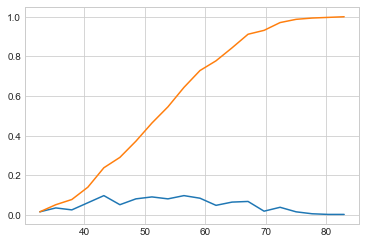

In [9]:
counts, bin_edges = np.histogram(haberman['Patients age'],bins=20,density=True)

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


plt.show();

[0.64379085 0.12745098 0.04575163 0.05228758 0.01960784 0.03921569
 0.00980392 0.01633987 0.02287582 0.00653595 0.00326797 0.00326797
 0.         0.00326797 0.         0.         0.         0.00326797
 0.         0.00326797]
[ 0.   2.6  5.2  7.8 10.4 13.  15.6 18.2 20.8 23.4 26.  28.6 31.2 33.8
 36.4 39.  41.6 44.2 46.8 49.4 52. ]


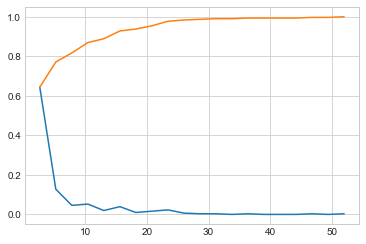

In [36]:
counts, bin_edges = np.histogram(haberman['Anxillary Nodes'],bins=20,density=True)

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

plt.show();

[0.02222222 0.03111111 0.04444444 0.06222222 0.04444444 0.08
 0.04       0.05333333 0.09777778 0.06666667 0.07555556 0.08888889
 0.04888889 0.04444444 0.08       0.03111111 0.02222222 0.04
 0.01333333 0.01333333]
[30.   32.35 34.7  37.05 39.4  41.75 44.1  46.45 48.8  51.15 53.5  55.85
 58.2  60.55 62.9  65.25 67.6  69.95 72.3  74.65 77.  ]


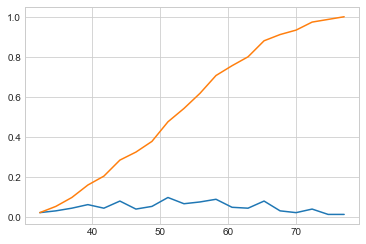

[0.02469136 0.01234568 0.04938272 0.07407407 0.12345679 0.07407407
 0.07407407 0.12345679 0.09876543 0.03703704 0.03703704 0.08641975
 0.04938272 0.04938272 0.03703704 0.01234568 0.01234568 0.01234568
 0.         0.01234568]
[34.   36.45 38.9  41.35 43.8  46.25 48.7  51.15 53.6  56.05 58.5  60.95
 63.4  65.85 68.3  70.75 73.2  75.65 78.1  80.55 83.  ]


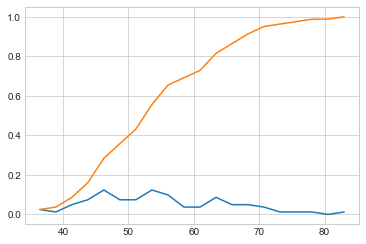

In [10]:
counts, bin_edges = np.histogram(haberman_1['Patients age'],bins=20,density=True)

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

plt.show();

counts, bin_edges = np.histogram(haberman_2['Patients age'],bins=20,density=True)

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

plt.show();

[0.73333333 0.10222222 0.02666667 0.05333333 0.01333333 0.00888889
 0.02222222 0.00444444 0.00888889 0.00888889 0.00444444 0.
 0.00444444 0.00444444 0.         0.         0.         0.
 0.         0.00444444]
[ 0.   2.3  4.6  6.9  9.2 11.5 13.8 16.1 18.4 20.7 23.  25.3 27.6 29.9
 32.2 34.5 36.8 39.1 41.4 43.7 46. ]
[0.39506173 0.17283951 0.0617284  0.08641975 0.04938272 0.08641975
 0.01234568 0.03703704 0.0617284  0.01234568 0.         0.
 0.         0.01234568 0.         0.         0.         0.
 0.         0.01234568]
[ 0.   2.6  5.2  7.8 10.4 13.  15.6 18.2 20.8 23.4 26.  28.6 31.2 33.8
 36.4 39.  41.6 44.2 46.8 49.4 52. ]


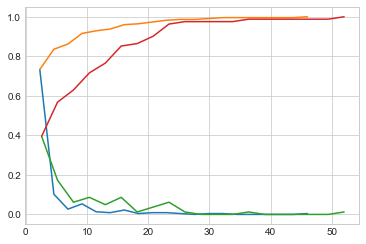

In [12]:
counts, bin_edges = np.histogram(haberman_1['Anxillary Nodes'],bins=20,density=True)

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(haberman_2['Anxillary Nodes'],bins=20,density=True)

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

plt.show();

[0.10666667 0.08       0.         0.10666667 0.         0.10222222
 0.         0.07111111 0.         0.09777778 0.10222222 0.
 0.06666667 0.         0.09777778 0.         0.09333333 0.
 0.04444444 0.03111111]
[58.   58.55 59.1  59.65 60.2  60.75 61.3  61.85 62.4  62.95 63.5  64.05
 64.6  65.15 65.7  66.25 66.8  67.35 67.9  68.45 69.  ]
[0.14814815 0.11111111 0.         0.04938272 0.         0.03703704
 0.         0.08641975 0.         0.09876543 0.09876543 0.
 0.16049383 0.         0.07407407 0.         0.04938272 0.
 0.03703704 0.04938272]
[58.   58.55 59.1  59.65 60.2  60.75 61.3  61.85 62.4  62.95 63.5  64.05
 64.6  65.15 65.7  66.25 66.8  67.35 67.9  68.45 69.  ]


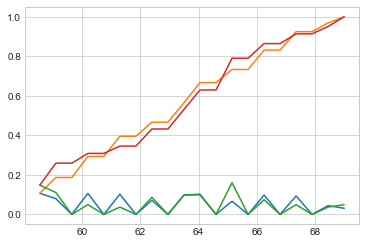

In [45]:
counts, bin_edges = np.histogram(haberman_1['Year of operation'],bins=20,density=True)

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

plt.show();

counts, bin_edges = np.histogram(haberman_2['Year of operation'],bins=20,density=True)

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

plt.show();

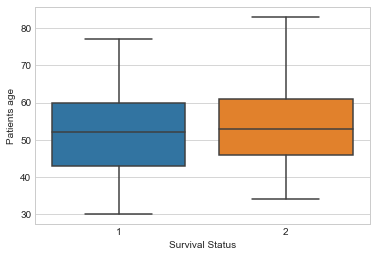

In [15]:
sns.boxplot(x='Survival Status',y='Patients age', data=haberman)
plt.show()

#From the Box-Plot it can be seen that patients aged below 45 survives with an error value of 25%
#From the Box-Plot it can be seen that patients aged Above 60 does not survive with an error value of 25%

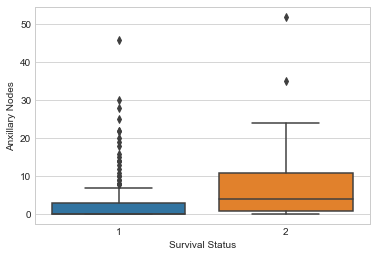

In [17]:
sns.boxplot(x='Survival Status',y='Anxillary Nodes', data=haberman)
plt.show()

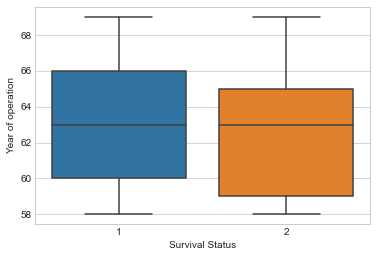

In [20]:
sns.boxplot(x='Survival Status',y='Year of operation', data=haberman)
plt.show()

#From the box-plot it can be observed that patients who undergone surgery in 1959-1960 always dies with error value of 25%
#From the box-plot it can be observed that patients who undergone surgery in 1965-1966 always survives with error value of 25%

Observation:
1) Box plot was plotted with Survival status and 3 different features.
2)From the box-plot it can be observed that patients who undergone surgery in 1959-1960 always dies with error value of 25%
3)From the box-plot it can be observed that patients who undergone surgery in 1965-1966 always survives with error value of 25%
4)From the Box-Plot it can be seen that patients aged below 45 survives with an error value of 25%
5)From the Box-Plot it can be seen that patients aged Above 60 does not survive with an error value of 25%

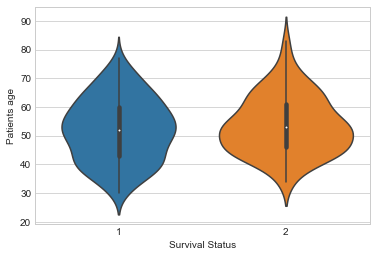

In [22]:
sns.violinplot(x="Survival Status", y="Patients age", data=haberman, size=8)
plt.show()

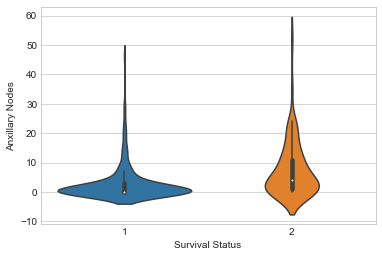

In [24]:
sns.violinplot(x="Survival Status", y="Anxillary Nodes", data=haberman, size=8)
plt.show()

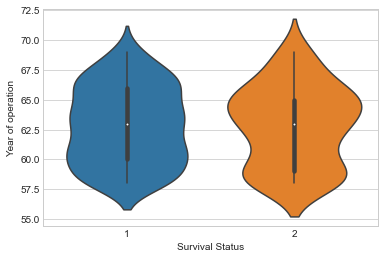

In [26]:
sns.violinplot(x="Survival Status", y="Year of operation", data=haberman, size=8)
plt.show()

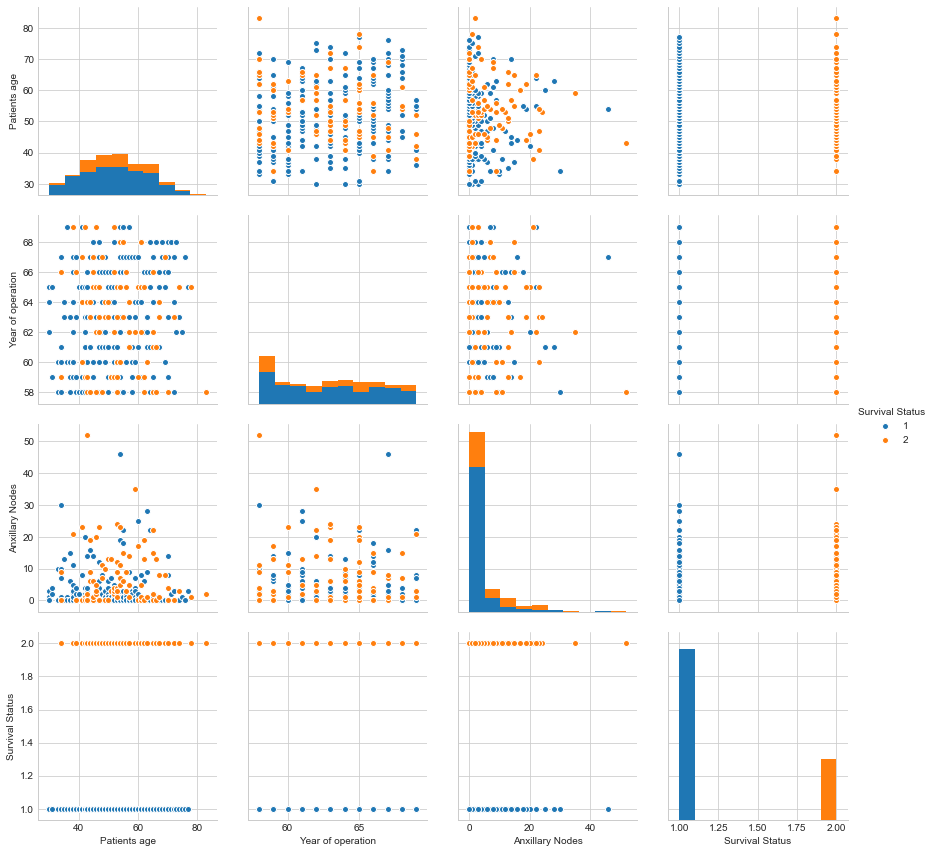

In [28]:
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="Survival Status", size=3);
plt.show()
# NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.

Observation:
 1) Pair-plot was plotted for the Haberman Dataset using various featueres.
 2) Nothing much can be deduced from the Pair-plot 
 3) Pair-plot was not helpful in deriving any conclusions.

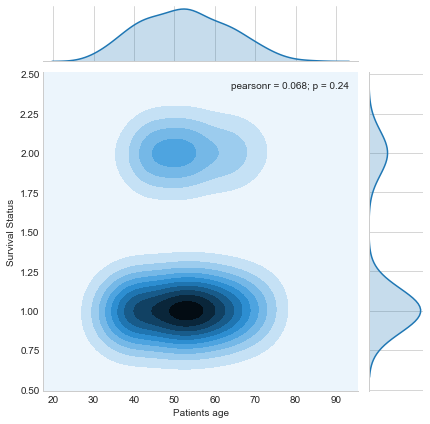

In [32]:
sns.jointplot(data=haberman, x="Patients age", y="Survival Status", kind="kde")
plt.show()

Observation:
1) From the joint-plot, it is observed that patients who survived mostly belong to 50 to 58 Age Group
2) Also, people who did not survive belong to 43 to 54 age group

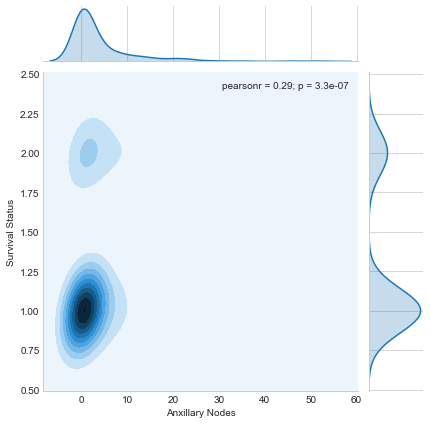

In [34]:
sns.jointplot(data=haberman, x="Anxillary Nodes", y="Survival Status", kind="kde")
plt.show()

Observation:
1) From joint-plot it can be seen that most people who survived had 0 Anxillary nodes.
1) From joint-plot it can be seen that most people who did not survive had 2-5 Anxillary nodes.

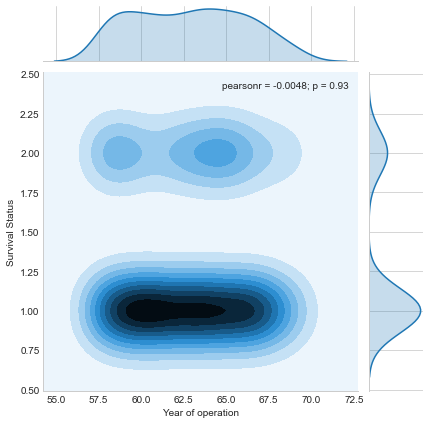

In [37]:
sns.jointplot(data=haberman, x="Year of operation", y="Survival Status", kind="kde")
plt.show()

Observation:
1)From joint-plot it can be observed that most people who survived had undergone surgery in the year 1959-1965.
2)From joint-plot it can be observed that most people who had not survived had undergone surgery in the year 1958-1960 and 1964-1966.